In [37]:
# Data Visualization
# Btech Computer Science Stream, January 2025
# Week 8 - Advanced Visualization
# Name: Mohammed Ahsan Bagsaria , 240968484 , Date:13/03/2025

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv("deliveries.csv")

In [40]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [42]:
df['extras_type'].fillna('No extras',inplace=True)
df['player_dismissed'].fillna('Not Out',inplace=True)
df['dismissal_kind'].fillna('Not Out',inplace=True)
df['fielder'].fillna('No Fielder',inplace=True)

In [43]:
df.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

The total runs scored by each team: 



,batting_team,total_runs
0,Chennai Super Kings,38629
1,Deccan Chargers,11463
2,Delhi Capitals,14900
3,Delhi Daredevils,24296
4,Gujarat Lions,4862
5,Gujarat Titans,7757
6,Kings XI Punjab,30064
7,Kochi Tuskers Kerala,1901
8,Kolkata Knight Riders,39331
9,Lucknow Super Giants,7510


Text(0.5, 1.0, 'Runs scored by each IPL Team')

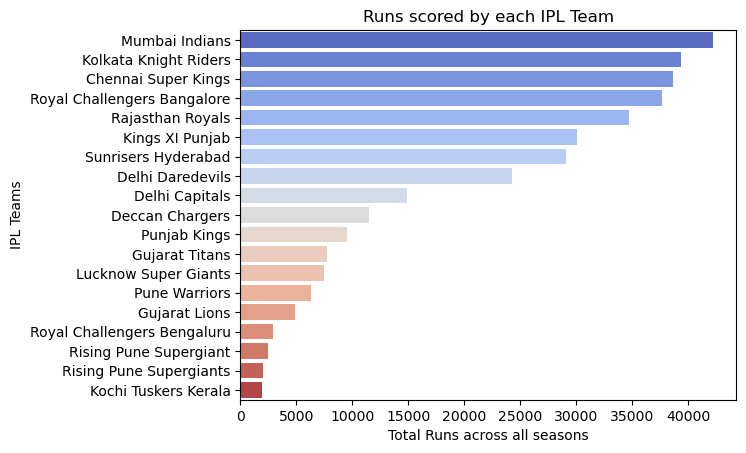

In [69]:
# 1. Find and visualize the total runs scored by each team.
tot_runs = df.groupby('batting_team')['total_runs'].sum().reset_index()
print("The total runs scored by each team: \n")
display(tot_runs)
sns.barplot(data= tot_runs.sort_values(by='total_runs',ascending=False),
            x='total_runs',y='batting_team',hue='batting_team',palette='coolwarm',errorbar=None)
plt.xlabel('Total Runs across all seasons')
plt.ylabel('IPL Teams')
plt.title('Runs scored by each IPL Team')

In [70]:
df['extras_type'].value_counts()

extras_type
No extras    246795
wides          8380
legbyes        4001
noballs        1069
byes            673
penalty           2
Name: count, dtype: int64

The top 10 highest scoring batters are:


,batter,batsman_runs
631,V Kohli,8014
512,S Dhawan,6769
477,RG Sharma,6630
147,DA Warner,6567
546,SK Raina,5536
374,MS Dhoni,5243
30,AB de Villiers,5181
124,CH Gayle,4997
501,RV Uthappa,4954
282,KD Karthik,4843


Text(0.5, 1.0, 'Top 10 batsmen')

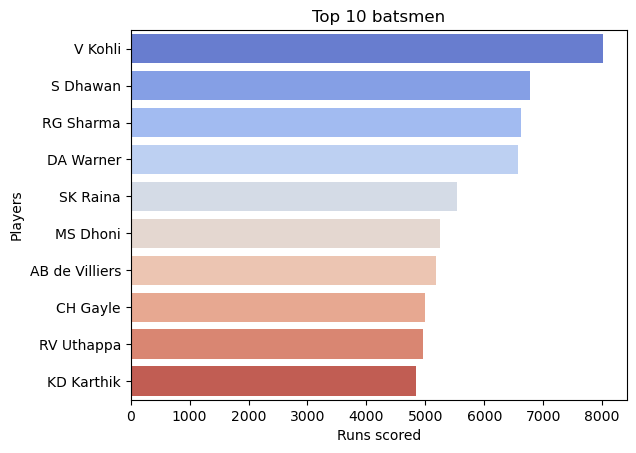

In [122]:
# 2. Identify and display the names of the top 10 highest-scoring batters with their total runs scored.
top_bats = df.groupby('batter')['batsman_runs'].sum().reset_index()
print("The top 10 highest scoring batters are:")
top_bats = top_bats.sort_values(by='batsman_runs',ascending=False).head(10)
display(top_bats) 
sns.barplot(data = top_bats, x='batsman_runs',y='batter',hue='batter',palette = 'coolwarm',errorbar=None)
plt.xlabel('Runs scored')
plt.ylabel('Players')
plt.title('Top 10 batsmen')

,bowler,is_wicket
449,YS Chahal,213
104,DJ Bravo,207
301,PP Chawla,201
383,SP Narine,200
308,R Ashwin,198
63,B Kumar,195
376,SL Malinga,188
7,A Mishra,183
171,JJ Bumrah,182
323,RA Jadeja,169


Text(0, 0.5, 'Number of wickets taken')

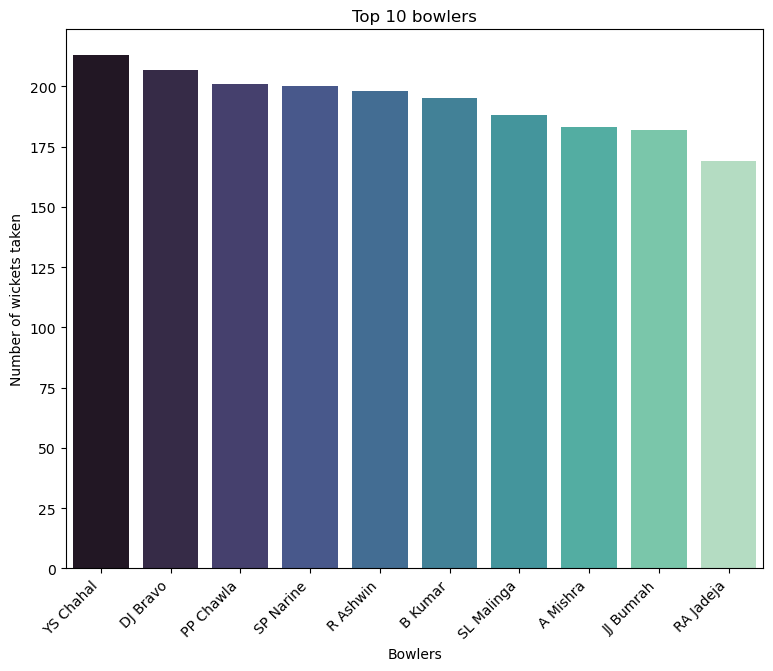

In [190]:
# 3. Find and visualize the top 10 bowlers with the most wickets.
wic = df[df['is_wicket']==1]
wick_takers = wic.groupby('bowler')['is_wicket'].count().reset_index()
wick_takers = wick_takers.sort_values(by='is_wicket',ascending=False).head(10) 
display(wick_takers)
plt.figure(figsize=(9,7))
sns.barplot(data = wick_takers , x='bowler',y='is_wicket',hue='bowler',palette='mako',legend=False)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 bowlers")
plt.xlabel('Bowlers')
plt.ylabel('Number of wickets taken')

,bowling_team,extra_runs
15,Rising Pune Supergiants,108
7,Kochi Tuskers Kerala,110
14,Rising Pune Supergiant,111
17,Royal Challengers Bengaluru,151
4,Gujarat Lions,188
5,Gujarat Titans,295
11,Pune Warriors,335
9,Lucknow Super Giants,386
12,Punjab Kings,480
1,Deccan Chargers,659


Text(0, 0.5, 'Teams')

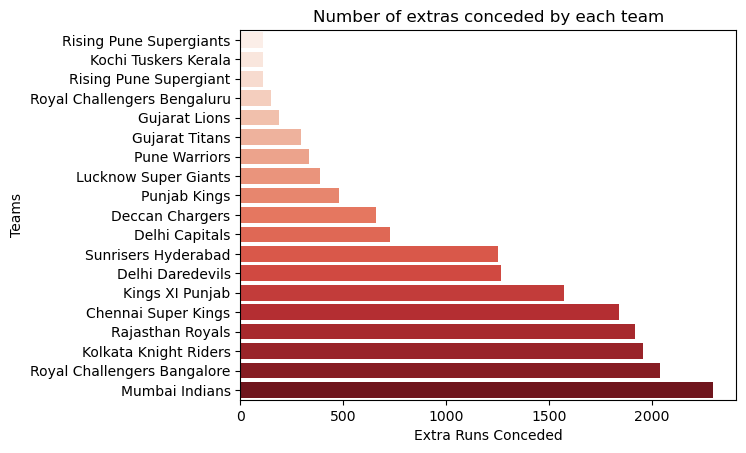

In [189]:
# 4. Tabulate and visualize the total number of extras conceded by each team.
# extras = df[df['extra_runs']!=0] - Optional since we're taking the sum not the count
extras = extras.groupby('bowling_team')['extra_runs'].sum().reset_index()
extras = extras.sort_values(by='extra_runs',ascending=True)
display(extras)
sns.barplot(data = extras, x='extra_runs',y='bowling_team',legend=False,hue='bowling_team',palette='Reds')
plt.title('Number of extras conceded by each team')
plt.xlabel('Extra Runs Conceded')
plt.ylabel('Teams')

,batter,runout_count
186,MS Dhoni,25
247,RG Sharma,20
329,V Kohli,20
136,KD Karthik,20
266,S Dhawan,16


Text(0, 0.5, 'Batters')

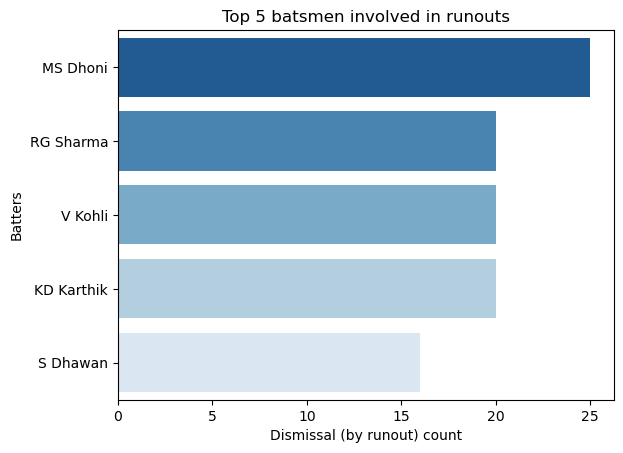

In [211]:
# 5. Tabulate and visualize the batsmen (top 5) involved in the most run-outs
rots = df[df['dismissal_kind']=='run out']
rots = rots.groupby('batter',as_index=False).agg(runout_count=('dismissal_kind','count'))
# When we use groupby, the other column automatically goes to aggregate , thus we can have a column alias
# For example: ['dismissal_kind'].count() will give the same result as the above statement , just without the column alias
rots = rots.sort_values(by='runout_count',ascending=False)
display(rots.head(5))
sns.barplot(data = rots.head(5), x= 'runout_count',y='batter',hue='batter',legend=False,palette = 'Blues_r',errorbar=None)
plt.title('Top 5 batsmen involved in runouts')
plt.xlabel('Dismissal (by runout) count')
plt.ylabel('Batters')

,bowler,extra_runs
71,B Kumar,307
438,SL Malinga,292
119,DJ Bravo,258
355,R Ashwin,257
494,UT Yadav,257


Text(0, 0.5, 'Bowlers')

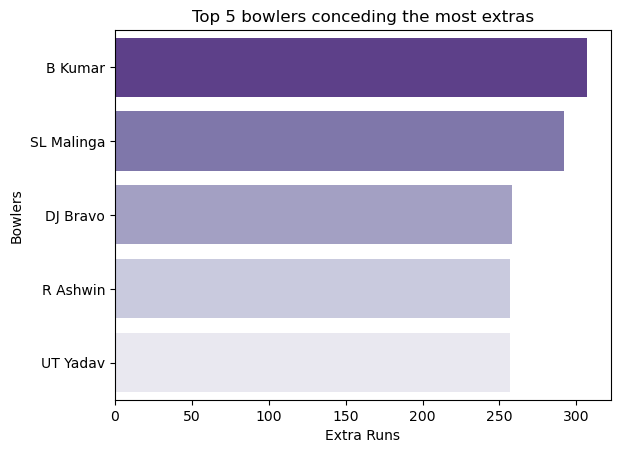

In [261]:
# 6. Tabulate and visualize the top 5 bowlers who conceded the most extras.
bowls = df.groupby('bowler')['extra_runs'].sum().reset_index()
bowls = bowls.sort_values(by='extra_runs',ascending = False)
display(bowls.head(5))
sns.barplot(data = bowls.head(5) , x= 'extra_runs', y='bowler',hue='bowler',legend= False, palette = 'Purples_r')
plt.title('Top 5 bowlers conceding the most extras')
plt.xlabel('Extra Runs')
plt.ylabel('Bowlers')

In [222]:
df['dismissal_kind'].value_counts()

dismissal_kind
Not Out                  247970
caught                     8063
bowled                     2212
run out                    1114
lbw                         800
caught and bowled           367
stumped                     358
retired hurt                 15
hit wicket                   15
obstructing the field         3
retired out                   3
Name: count, dtype: int64

,dismissal_kind,count
0,bowled,2212
1,caught,8063
2,caught and bowled,367
3,hit wicket,15
4,lbw,800
5,obstructing the field,3
6,retired hurt,15
7,retired out,3
8,run out,1114
9,stumped,358


The most common dismissal type:


,dismissal_kind,count
1,caught,8063


Text(0, 0.5, 'Dismissal Kind')

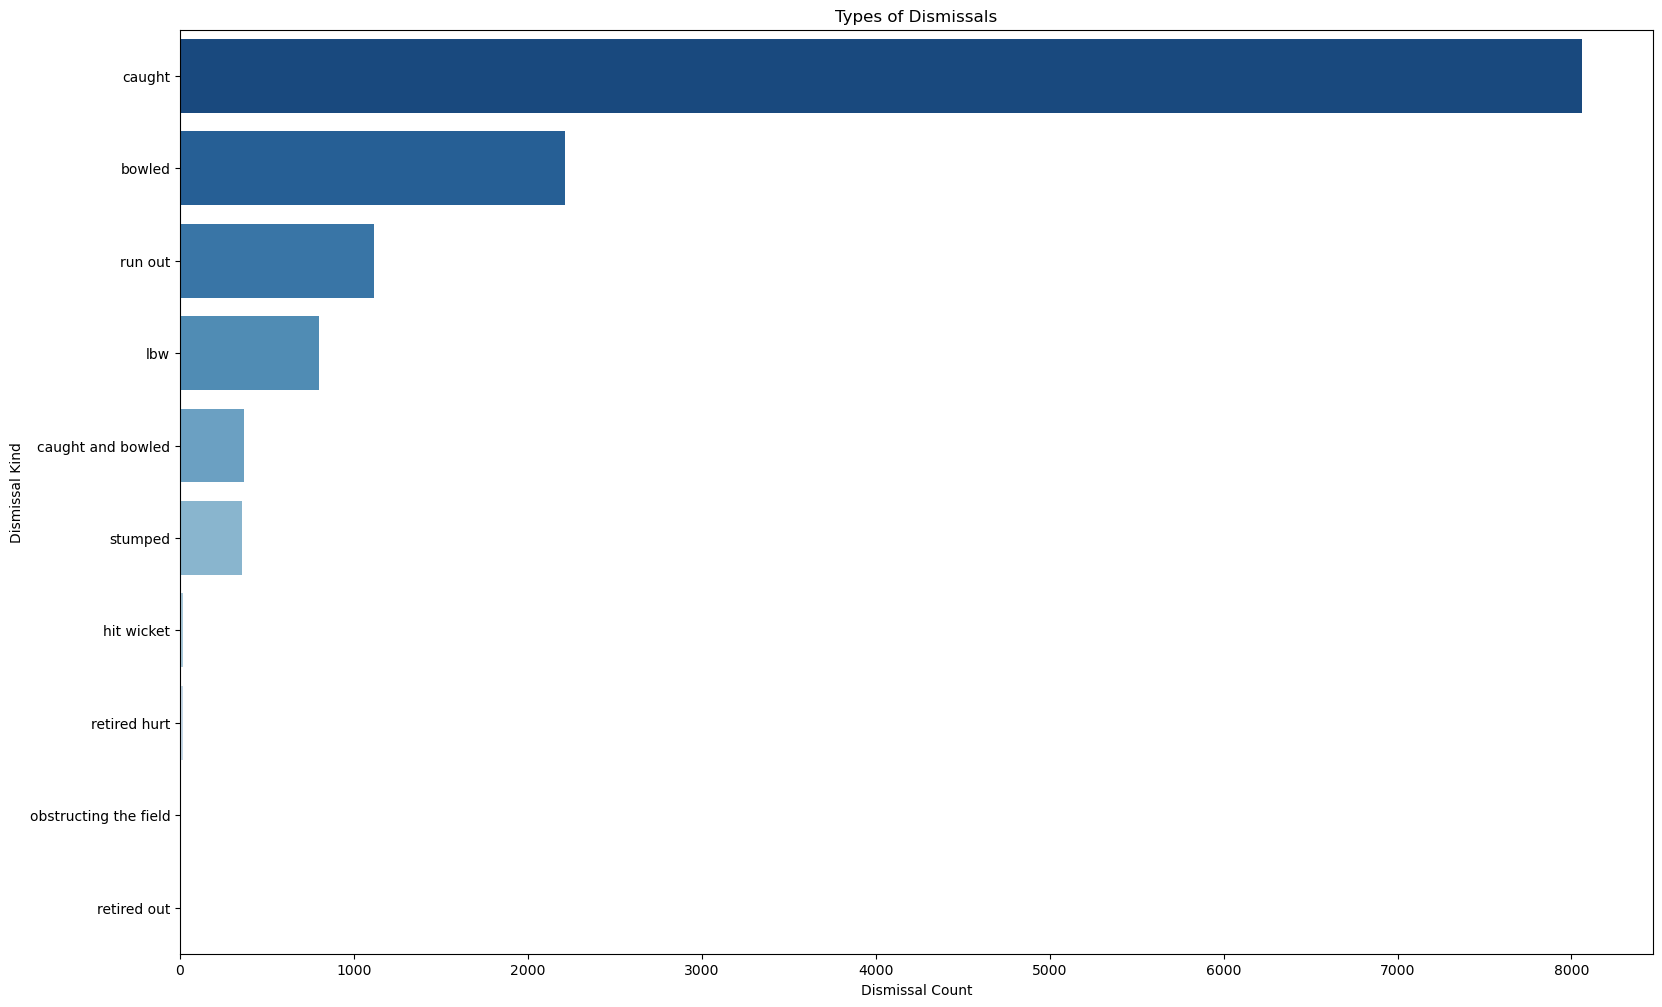

In [310]:
# 7. Tabulate and visualize the most common dismissal type
dismissals = df[df['dismissal_kind']!='Not Out']
dismissals = dismissals.groupby('dismissal_kind').agg(count = ('dismissal_kind','count'))
req = dismissals.reset_index()
display(req)
print('The most common dismissal type:')
display(req[req['count']==req['count'].max()])
plt.figure(figsize = (19,12))
req= req.sort_values(by='count',ascending=False)
sns.barplot(data= req,x='count',y='dismissal_kind',legend=False,hue='dismissal_kind',palette='Blues_r')
plt.title('Types of Dismissals')
plt.xlabel('Dismissal Count')
plt.ylabel('Dismissal Kind')

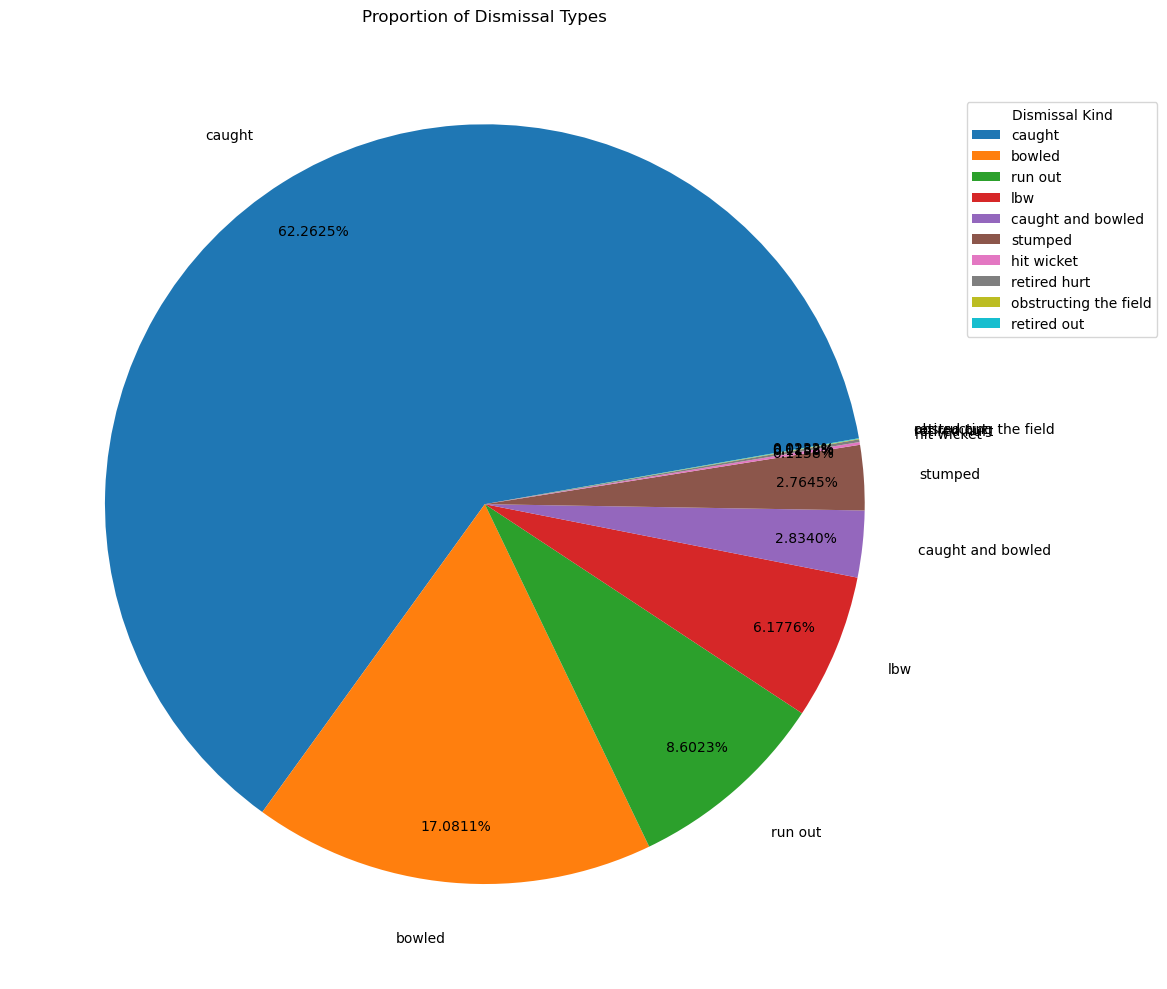

In [377]:
plt.figure(figsize = (17,10))
plt.pie(req['count'],labels = req['dismissal_kind'],autopct = '%1.4f%%',
        startangle = 10,pctdistance = 0.85,labeldistance=1.147)
plt.legend(title='Dismissal Kind',loc='center left',bbox_to_anchor=(1,0.8))
plt.title('Proportion of Dismissal Types')
plt.tight_layout()

The top 3 overs with the highest run rate:


,total_runs,total_balls,run_rate
over,,,
19,17765,9998,10.661132
18,19076,11583,9.881378
17,19559,12318,9.527034


The over with the highest run rate:


,total_runs,total_balls,run_rate
over,,,
19,17765,9998,10.661132


Text(0.5, 0, 'Overs')

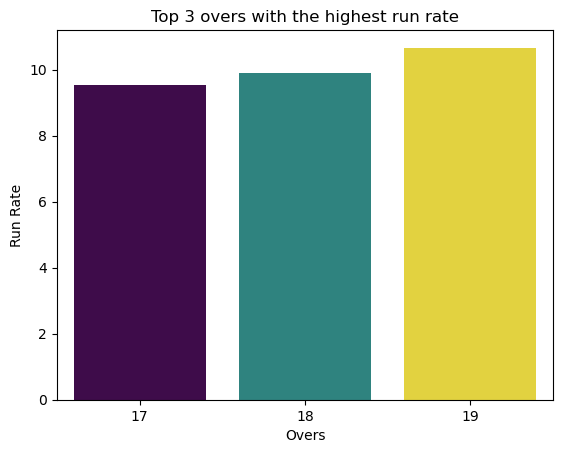

In [350]:
# 8. Find and display which of the top 3 overs has the highest run rate
over_stats = df.groupby('over').agg(total_runs=('total_runs', 'sum'), total_balls=('ball', 'count'))
over_stats['run_rate'] = (over_stats['total_runs'] / over_stats['total_balls']) *6
top_3 = over_stats.sort_values(by='run_rate',ascending=False).head(3)
print("The top 3 overs with the highest run rate:")
display(top_3)
print('The over with the highest run rate:')
display(top_3.iloc[[0]])
sns.barplot(data=top_3,y='run_rate',x='over',legend=False,palette='viridis',hue='over')
plt.title('Top 3 overs with the highest run rate')
plt.ylabel('Run Rate')
plt.xlabel('Overs')

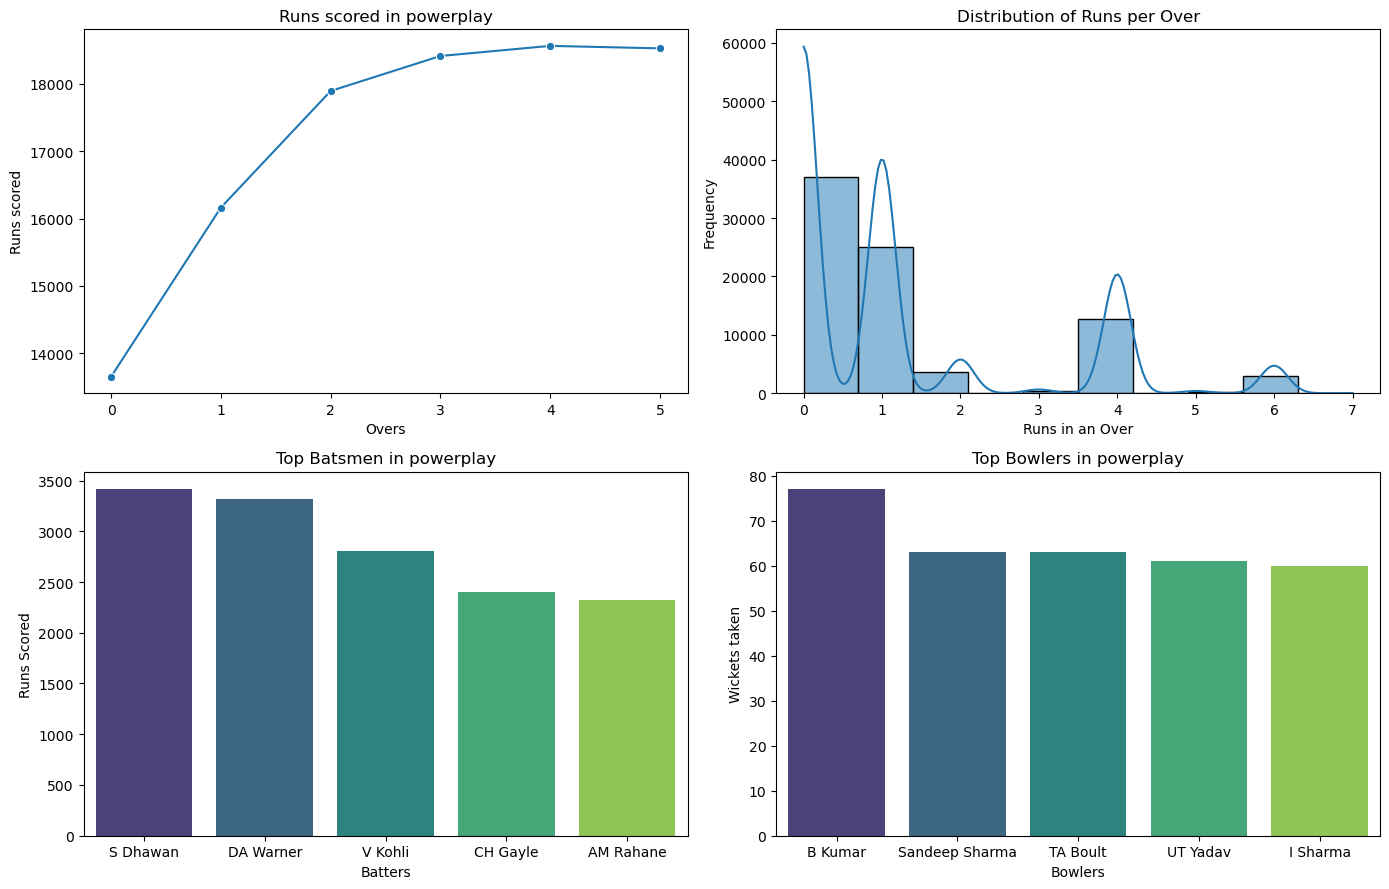

In [361]:
# 9. Analyze and visualize powerplay performance (first 6 overs).
# power = df[df['over'].isin([0,1,2,3,4,5])]
power = df[df['over']<=5] # First 6 overs
fig,axes = plt.subplots(2,2,figsize = (14,9))
runs = power.groupby('over')['total_runs'].sum().reset_index()
sns.lineplot(data = runs, y='total_runs',x='over',marker= 'o',ax=axes[0,0])
axes[0,0].set_title('Runs scored in powerplay')
axes[0,0].set_xlabel('Overs')
axes[0,0].set_ylabel('Runs scored')

sns.histplot(data=power, x='total_runs', bins=10, kde=True, ax=axes[0,1])  
axes[0,1].set_title('Distribution of Runs per Over')
axes[0,1].set_xlabel('Runs in an Over')
axes[0,1].set_ylabel('Frequency')

top_players = power.groupby('batter')['batsman_runs'].sum().reset_index()
top_players = top_players.sort_values(by='batsman_runs',ascending=False)
sns.barplot(data = top_players.head(5),x= 'batter',y='batsman_runs',legend=False,palette = 'viridis',hue='batter',ax=axes[1,0])
axes[1,0].set_title('Top Batsmen in powerplay')
axes[1,0].set_xlabel('Batters')
axes[1,0].set_ylabel('Runs Scored')

power1 = power[power['is_wicket']==1]
top_bowlers = power1.groupby('bowler')['is_wicket'].count().reset_index()
top_bowlers = top_bowlers.sort_values(by='is_wicket',ascending=False)
sns.barplot(data = top_bowlers.head(5) , x='bowler',y='is_wicket',legend=False,palette='viridis',hue='bowler',ax=axes[1,1])
axes[1,1].set_title('Top Bowlers in powerplay')
axes[1,1].set_xlabel('Bowlers')
axes[1,1].set_ylabel('Wickets taken')

plt.tight_layout()

# Thus , from the lineplot, we can see that the run rate is highest for over no. 5 (4 on the graph)
# Also, from the histogram graph (for frequency), we can say that, in the powerplay, the most common score per over lies around 1 run.
# The best batsmen and bowlers are also visualized, giving a clear idea of who is likely to play exceptionally well in the powerplay session

The top 5 batsmen (with most sixes and fours) are:


,batter,s_and_f_count
532,V Kohli,981
437,S Dhawan,921
126,DA Warner,899
409,RG Sharma,880
109,CH Gayle,767


Text(0, 0.5, 'Number of sixes / fours')

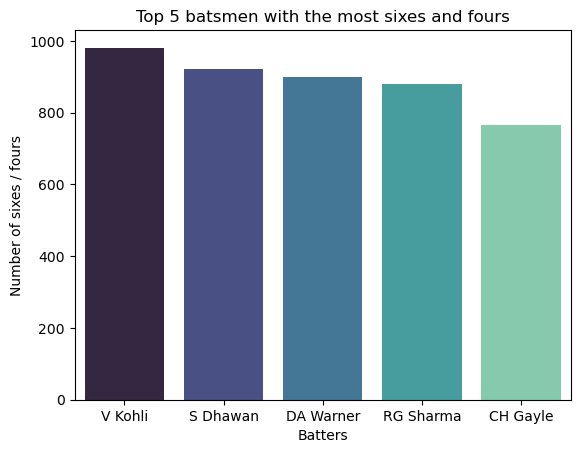

In [384]:
# 10. Tabulate and visualize the top 5 batsmen with the most sixes and fours.
s_and_f = df[df['batsman_runs'].isin([4,6])]
top_bat = s_and_f.groupby('batter').agg(s_and_f_count = ('batsman_runs','count')).reset_index()
top_bat = top_bat.sort_values(by='s_and_f_count',ascending=False)
print('The top 5 batsmen (with most sixes and fours) are:')
display(top_bat.head(5))

sns.barplot(data= top_bat.head(5), x='batter',y='s_and_f_count',hue='batter',legend=False,palette='mako')
plt.title('Top 5 batsmen with the most sixes and fours')
plt.xlabel('Batters')
plt.ylabel('Number of sixes / fours')